In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

In [ ]:
# Взглянем на наши данные
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
data.shape

(32581, 12)

В данном дата-сете 32581 строка и 12 столбцов, подробнее рассмотрим его содержимое

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Имеются пропуски в столбце person_emp_length (продолжительность работы в годах) и loan_int_rate (процентная ставка)

In [ ]:
data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Разделим датасет на категориальные и числовые признаки

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('loan_status')
print(f'Числовые признаки: {numeric_columns}')
categorical_columns = data.select_dtypes(include='object').columns
print(f'Категориальные признаки: {categorical_columns}')

Числовые признаки: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')
Категориальные признаки: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


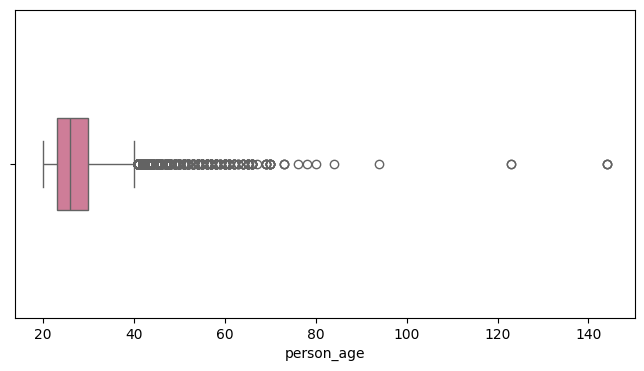

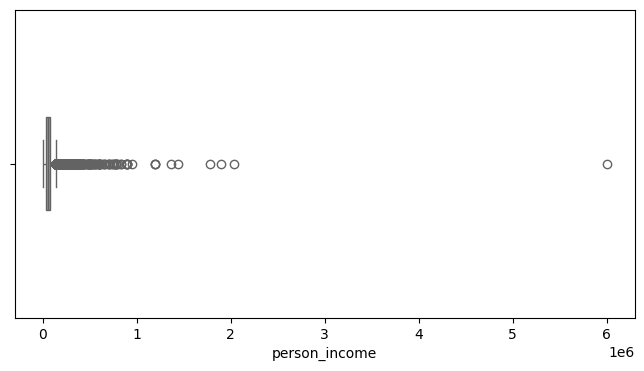

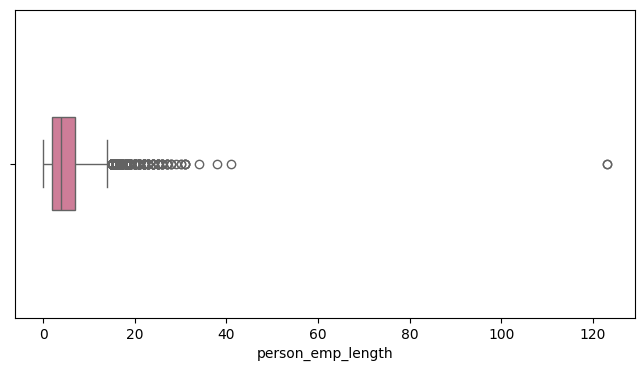

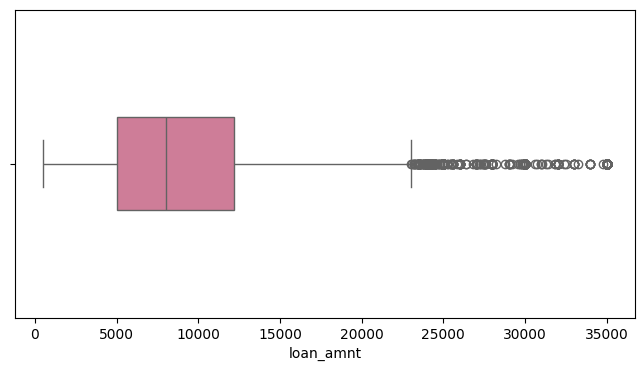

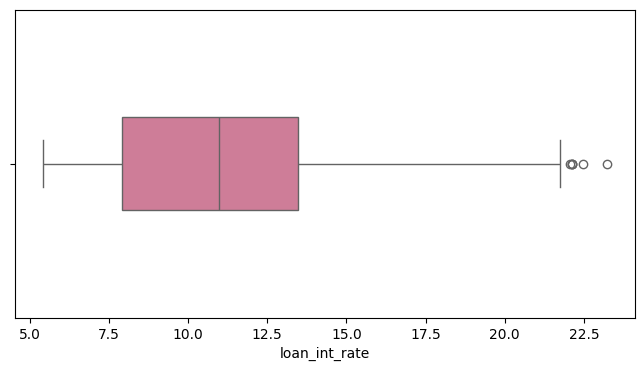

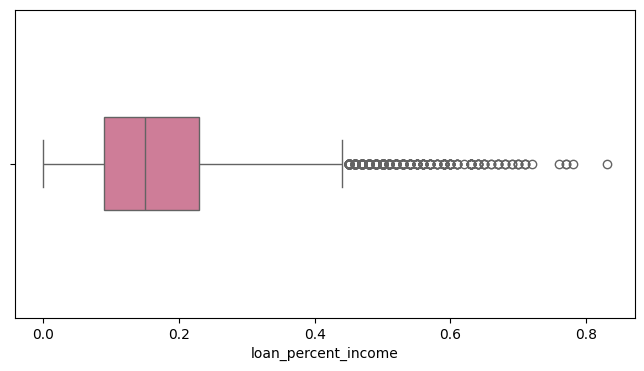

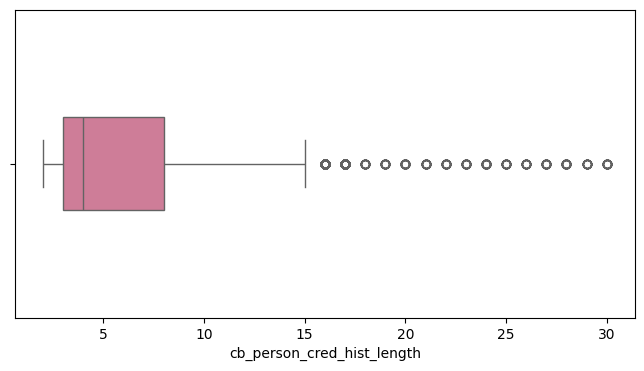

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(data=data, x=col, width=0.3, color="#DB7093")
  plt.show()

In [ ]:
# Очистим данные от выбросов

def cleaner(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - (3 * iqr)
    upper_limit = q3 + (3 * iqr)

    cleaned_data = data[col].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)
    return cleaned_data

for col in numeric_columns:
    data[col] = cleaner(data, col)

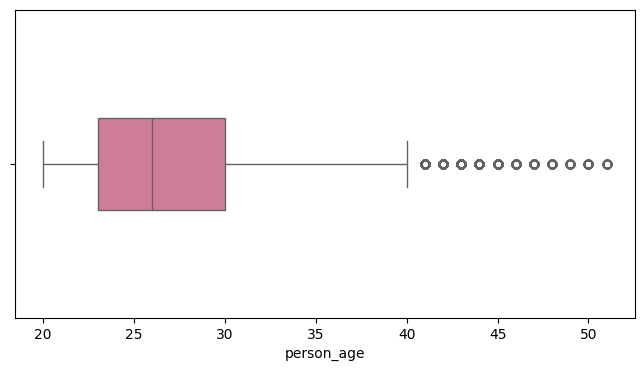

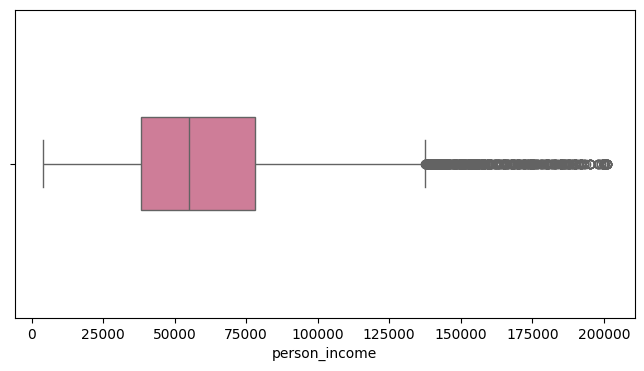

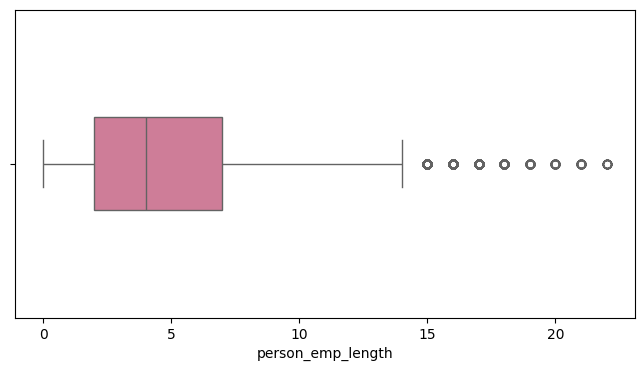

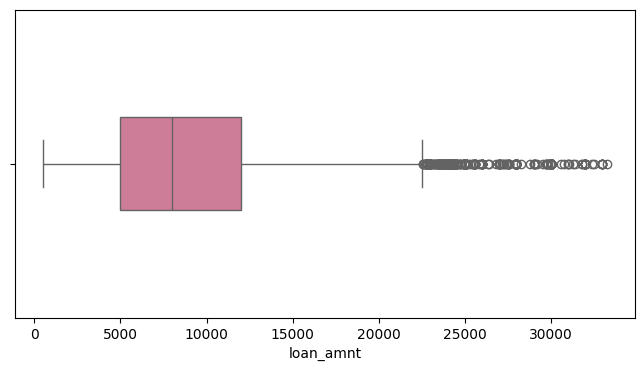

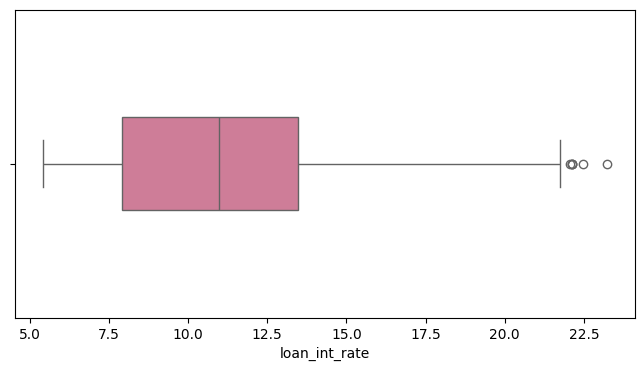

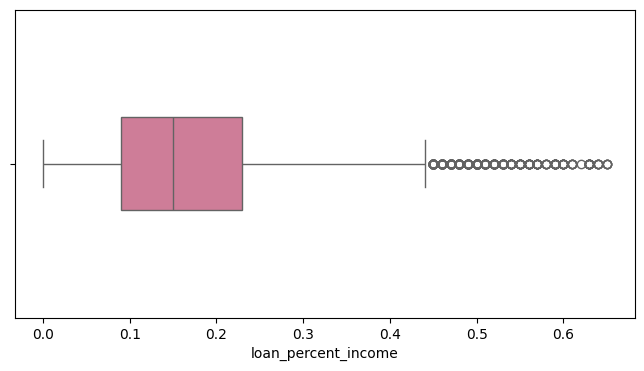

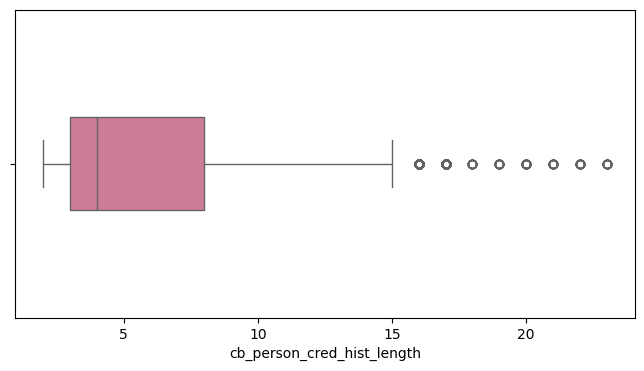

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(data=data, x=col, width=0.3, color="#DB7093")
  plt.show()

In [ ]:
# Заполним пропуски медианным значением

for col in numeric_columns:
  data[col] = data[col].fillna(data[col].median())

data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


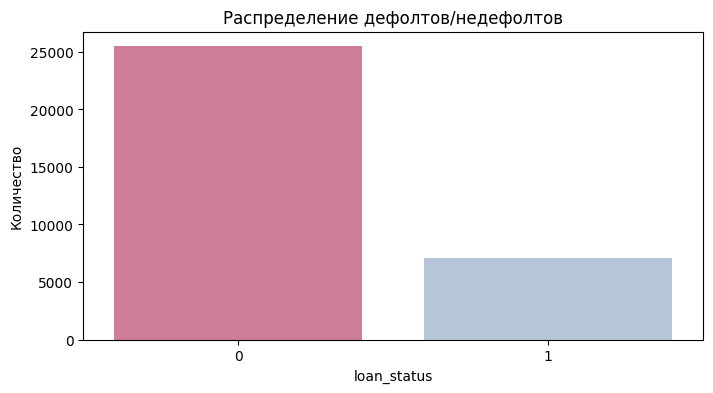

In [ ]:
# Рассмотрим соотношение между количеством дефолтов и недефолтов

colors = ["#DB7093", "#B0C4DE"]
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='loan_status', hue='loan_status',legend=False, palette=colors)
plt.title('Распределение дефолтов/недефолтов')
plt.xlabel('loan_status')
plt.ylabel('Количество')
plt.show()

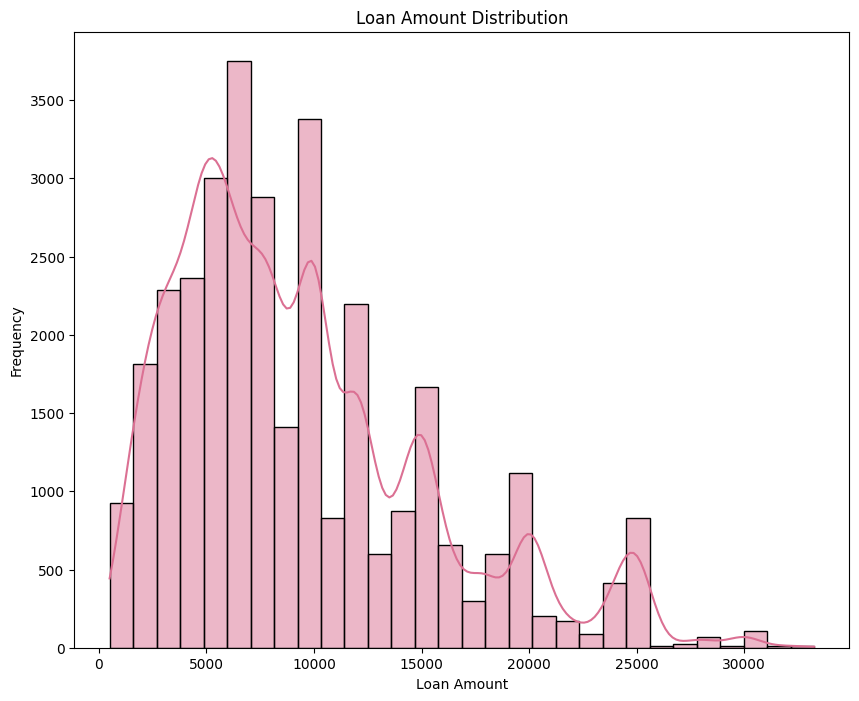

In [ ]:
# Построим гистограмму распределения суммы выданного кредита

plt.figure(figsize=(10,8))
sns.histplot(data['loan_amnt'], bins=30, kde=True, color="#DB7093")
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Рассмотрим значения категориальных признаков и преобразуем их в числовые

for col in categorical_columns:
  value_counts = data[col].value_counts()
  print(value_counts)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [ ]:
# Значения в столбце loan_grade и person_home_ownership закодируем при помощи OrdinalEncoder

encoder_loan_grade = OrdinalEncoder(categories=[['G', 'F', 'E', 'D', 'C', 'B', 'A']])
data['loan_grade'] = encoder_loan_grade.fit_transform(data[['loan_grade']])

encoder_person_home_ownership = OrdinalEncoder(categories=[['OTHER', 'RENT', 'MORTGAGE', 'OWN']])
data['person_home_ownership'] = encoder_person_home_ownership.fit_transform(data[['person_home_ownership']])

#
data = pd.get_dummies(data, columns=['cb_person_default_on_file', 'loan_intent'], drop_first=True, dtype='uint8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  float64
 1   person_income                32581 non-null  float64
 2   person_home_ownership        32581 non-null  float64
 3   person_emp_length            32581 non-null  float64
 4   loan_grade                   32581 non-null  float64
 5   loan_amnt                    32581 non-null  float64
 6   loan_int_rate                32581 non-null  float64
 7   loan_status                  32581 non-null  int64  
 8   loan_percent_income          32581 non-null  float64
 9   cb_person_cred_hist_length   32581 non-null  float64
 10  cb_person_default_on_file_Y  32581 non-null  uint8  
 11  loan_intent_EDUCATION        32581 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  32581 non-null  uint8  
 13  loan_intent_MEDI

In [ ]:
# Найдем топ коррелирующих между собой пар признаков при помощи кода:

def get_red_pairs(data):
  pairs_to_drop = set()
  cols = data.columns
  for i in range(0, data.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

def get_top_abs_corrs(data, n=5):
  au_corr = data.corr().abs().unstack()
  labels_to_drop = get_red_pairs(data)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_corrs(data, 10))

Top Absolute Correlations
loan_grade     loan_int_rate                  0.889929
person_age     cb_person_cred_hist_length     0.829754
loan_amnt      loan_percent_income            0.573069
loan_grade     cb_person_default_on_file_Y    0.537054
loan_int_rate  cb_person_default_on_file_Y    0.477146
loan_status    loan_percent_income            0.377792
loan_grade     loan_status                    0.373080
person_income  loan_amnt                      0.371443
               loan_percent_income            0.337563
loan_int_rate  loan_status                    0.319360
dtype: float64


In [ ]:
data = data.drop(['loan_grade', 'person_age'], axis=1)

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_corrs(data, 10))

Top Absolute Correlations
loan_amnt              loan_percent_income            0.573069
loan_int_rate          cb_person_default_on_file_Y    0.477146
loan_status            loan_percent_income            0.377792
person_income          loan_amnt                      0.371443
                       loan_percent_income            0.337563
loan_int_rate          loan_status                    0.319360
person_income          loan_status                    0.237891
loan_intent_EDUCATION  loan_intent_MEDICAL            0.237823
person_home_ownership  loan_status                    0.231284
loan_intent_EDUCATION  loan_intent_VENTURE            0.229308
dtype: float64


Разделение на обучающую и тестовую выборки, обучение модели

In [ ]:
X = data.drop('loan_status', axis = 1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Обучим модель логистической регресии

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy модели логистической регресии: {model.score(X_test, y_test)}')

Accuracy модели логистической регресии: 0.7956114776737763


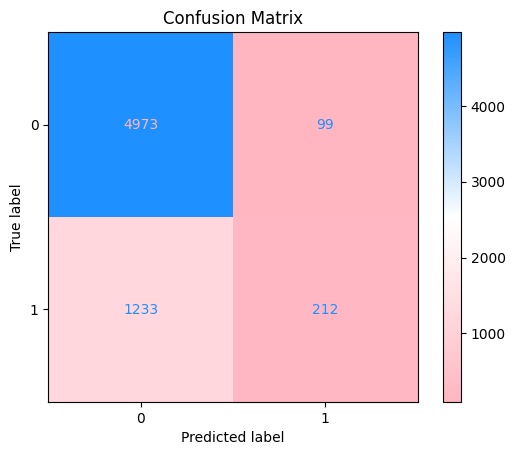

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

my_cmap = LinearSegmentedColormap.from_list(
    'my_cmap',
    ['#FFB6C1', '#FFFFFF', '#1E90FF']
)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot(cmap=my_cmap)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5072
           1       0.68      0.15      0.24      1445

    accuracy                           0.80      6517
   macro avg       0.74      0.56      0.56      6517
weighted avg       0.77      0.80      0.74      6517



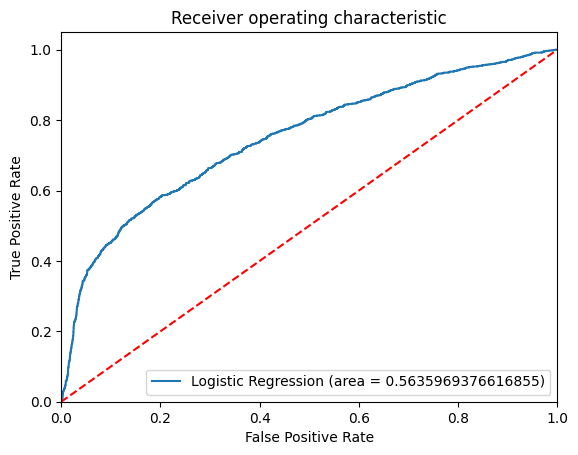

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {logit_roc_auc})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# ОБучим модель градиентного бустинга
import xgboost as xgb
from xgboost import XGBClassifier


model_xgb = XGBClassifier(eval_metric = 'logloss')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_train_hat = model_xgb.predict(X_train)
y_test_hat = model_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

recall_train = recall_score(y_train, y_train_hat, pos_label=1)
precision_train = precision_score(y_train, y_train_hat, pos_label=1)
accuracy_train = accuracy_score(y_train, y_train_hat)

print('recal test:', recall_train)
print('precision test:', precision_train)
print('accuracy test:', accuracy_train)

recal test: 0.7780328447819177
precision test: 0.9819478493425451
accuracy test: 0.9486648250460405


In [ ]:
# Применим кросс-валидацию:

cv_score = cross_validate(model_xgb, X, y, scoring=['recall','precision','f1','accuracy'], cv=5)
print('recall: ', cv_score['test_recall'])
print('precision:', cv_score['test_precision'])
print('f1: ', cv_score['test_f1'])
print('accuracy: ', cv_score['test_accuracy'])

recall:  [0.81082982 0.57946554 0.70323488 0.62631949 0.66009852]
precision: [0.72652804 0.81022616 0.86956522 0.9035533  0.93240557]
f1:  [0.76636756 0.67568676 0.77760498 0.73981712 0.77297075]
accuracy:  [0.89212828 0.87860651 0.91221608 0.90392879 0.91543892]


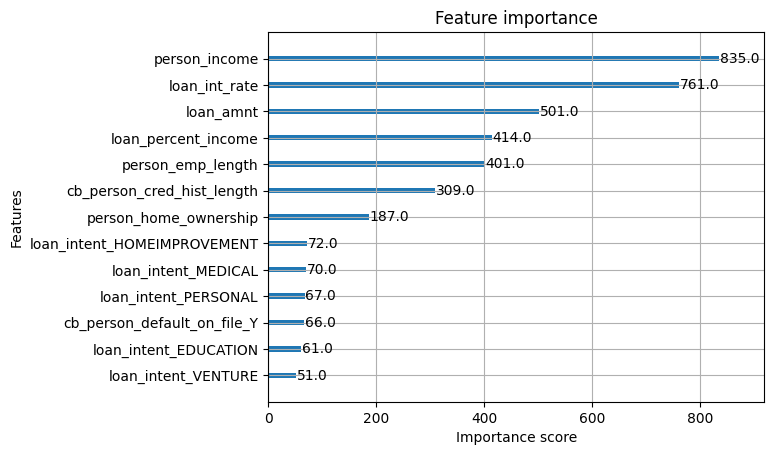

In [ ]:
xgb.plot_importance(model_xgb, importance_type='weight')
plt.show()